# Introduction to Statistics in Python

What is the likelihood of someone purchasing your product, how many calls will your support team receive, and how many jeans sizes should you manufacture to fit 95% of the population? In this course, we'll discover how to answer questions like these.

## 1. Summary Statistics
Summary statistics gives you the tools you need to boil down massive datasets to reveal the highlights. In this chapter, we'll explore summary statistics including mean, median, and standard deviation, and learn how to accurately interpret them. We'll also develop our critical thinking skills, allowing us to choose the best summary statistics for our data.

#### 1.1 Measures of center
In this chapter, we'll be working with the [2018 Food Carbon Footprint Index](https://www.nu3.de/blogs/nutrition/food-carbon-footprint-index-2018) from nu3. The `food_consumption` dataset contains information about the kilograms of food consumed per person per year in each country in each food category (`consumption`) as well as information about the carbon footprint of that food category (`co2_emissions`) measured in kilograms of carbon dioxide, or $\text{CO}_2$, per person per year in each country.

In this exercise, we'll compute measures of center to compare food consumption in the US and Belgium using your pandas and numpy skills.

In [32]:
# Import packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import uniform, binom, norm

In [2]:
# Load data
food_consumption = pd.read_csv('data/food_consumption.csv')

# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.132727272727266
12.59
44.650000000000006
14.58


There is a more "elegant" way to generate the results of the the cell above:

In [3]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


Now we'll compare the two measures of center, mean vs median.

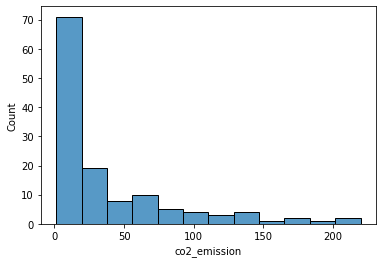

In [4]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
sns.histplot(rice_consumption['co2_emission'])
plt.show()

In [5]:
# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


Given the skew of this data, the median measure of central best summarizes the kilograms of $\text{CO}_2$ emissions per person per year for rice.

#### 1.2 Measures of spread

Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

In this exercise, we'll calculate quartiles, quintiles, and deciles, which split up a dataset into 4, 5, and 10 pieces, respectively.

In [6]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

# Calculate the six quantiles that split up the co2_emission into 5 pieces (quintiles)
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 6)))

# Calculate the six quantiles that split up the co2_emission into 10 pieces (deciles)
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))

[   0.        5.21     16.53     62.5975 1712.    ]
[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


While calculating more quantiles gives us a more detailed look at the data, it also produces more numbers, making the summary more difficult to quickly understand.

Variance and standard deviation are two of the most common ways to measure the spread of a variable, and we'll practice calculating these in this exercise. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


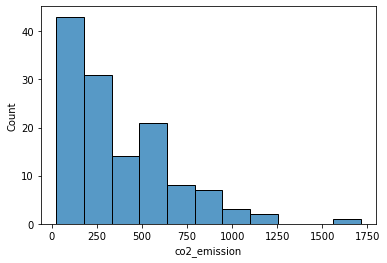

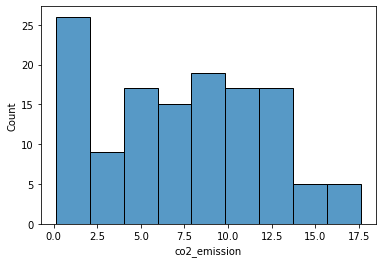

In [7]:
# Print variance and std of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))


# Create histogram of co2_emission for food_category 'beef'
sns.histplot(food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'])

# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
sns.histplot(food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'])

# Show plot
plt.show()

Beef has the largest amount of variation in its $\text{CO}_2$ emissions, while eggs have a relatively small amount of variation.

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than $\text{Q1} - 1.5 \times \text{IQR}$ or greater than $\text{Q3} + 1.5 \times \text{IQR}$, it's considered an outlier. In fact, this is how the lengths of the whiskers in a matplotlib box plot are calculated.

<img src="fig/iqr.png" width=600  />

In this exercise, we'll calculate IQR and use it to find some outliers.

In [8]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


It looks like Argentina has a substantially higher amount of $\text{CO}_2$ emissions per person than other countries in the world.

## 2. Random Numbers and Probability

In this chapter, we'll learn how to generate random samples and measure chance using probability. We'll work with real-world sales data to calculate the probability of a salesperson being successful. Finally, weu’ll use the binomial distribution to model events with binary outcomes.

#### 2.1 What are the chances?

SCENARIO: _You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply._ 

Before we start selecting deals, we'll first figure out what the chances are of selecting certain deals.

$$ P(\text{event}) = \frac{ \text{# event can happen} }{ \text{total # of possible outcomes} } $$

In [9]:
# load and preview the data
amir_deals = pd.read_csv('data/amir_deals.csv')
amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


In [10]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / counts.sum()
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


Now it's time to randomly pick five deals so that we can reach out to each customer and ask if they were satisfied with the service they received. We'll try doing this both with and without replacement.

Additionally, we want to make sure this is done randomly and that it can be reproduced in case we get asked how we chose the deals, so we'll need to set the random seed before sampling from the deals.

In [11]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [12]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


It's important to consider how we'll take a sample since there's no one-size-fits-all way to sample, and this can have an effect on our results. In our case, we need to follow "without replacement" strategy, otherwise we might end up calling the same customer twice.

#### 2.2 Discrete distributions

SCENARIO: _A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly._

In this exercise, we'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the `restaurant_groups` DataFrame. 

In [13]:
# load and preview the data
restaurant_groups = pd.read_csv('data/restaurant_groups.csv')
restaurant_groups.head()

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2


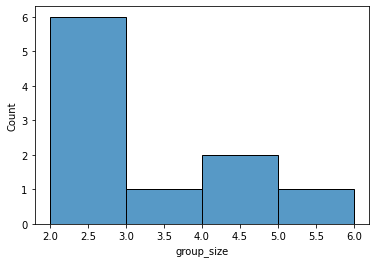

In [14]:
# Create a histogram of restaurant_groups and show plot
sns.histplot(data=restaurant_groups, x="group_size", bins=[2, 3, 4, 5, 6])
plt.show()

In [16]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

0.30000000000000004


We'll continue to build upon these skills since many statistical tests and methods use probability distributions as their foundation.

#### 2.3 Continuous distributions

SCENARIO: _The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up._ 

We will use our new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

In [21]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30


# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print("The probability of Amir waiting less than 5 mins is {0:.2f}".format(prob_less_than_5))

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print("The probability of Amir waiting more than 5 mins is {0:.2f}".format(prob_greater_than_5))

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print("The probability of Amir waiting 10-20 mins is {0:.2f}".format(prob_between_10_and_20))

The probability of Amir waiting less than 5 mins is 0.17
The probability of Amir waiting more than 5 mins is 0.83
The probability of Amir waiting 10-20 mins is 0.33


There's a 33% chance that Amir will wait 10-20 minutes. We'll make sure this calculation holds up by simulating some wait times. To give Amir a better idea of how long he'll have to wait, we'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. 

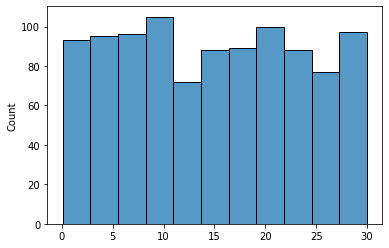

In [23]:
# Set random seed to 334
np.random.seed(334)

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(min_time, max_time, size=1000)

# Create a histogram of simulated times and show plot
sns.histplot(wait_times)
plt.show()

Unless Amir figures out exactly what time each backup happens, he won't be able to time his data entry so it gets backed up sooner, but it looks like he'll wait about 15 minutes on average.

#### 2.4 The binomial distribution

SCENARIO: _Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution._

In this exercise, we'll help Amir simulate a year's worth of his deals so he can better understand his performance.

In [25]:
# Set random seed to 10
np.random.seed(10)

# Simulate 1 week of 3 deals
# print(binom.rvs(3, 0.3, size=1))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

0.8269230769230769


In this simulated year, Amir won 0.83 deals on average each week.

SCENARIO: _Assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week._

In this exercise, we'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.

In [28]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print("The probability of Amir closing 3 out of 3 deals is {0:.2f}".format(prob_3))

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print("The probability of Amir closing <= 1 deal out of 3 deals is {0:.2f}".format(prob_less_than_or_equal_1))

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print("The probability of Amir closing > 1 deal out of 3 deals is {0:.2f}".format(prob_greater_than_1))

The probability of Amir closing 3 out of 3 deals is 0.03
The probability of Amir closing <= 1 deal out of 3 deals is 0.78
The probability of Amir closing > 1 deal out of 3 deals is 0.22


Amir has about a 22% chance of closing more than one deal in a week. 

SCENARIO: _Now Amir wants to know how many deals he can expect to close each week if his win rate changes._ 

Luckily, we can use our binomial distribution knowledge to help him calculate the expected value in different situations. Recall that the expected value of a binomial distribution can be calculated by $n \times p$.

In [30]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print("Amir's expected number won with 30% win rate is {0:.2f}".format(won_30pct))

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print("Amir's expected number won with 25% win rate is {0:.2f}".format(won_25pct))

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print("Amir's expected number won with 35% win rate is {0:.2f}".format(won_35pct))

Amir's expected number won with 30% win rate is 0.90
Amir's expected number won with 25% win rate is 0.75
Amir's expected number won with 35% win rate is 1.05


If Amir's win rate goes up by 5%, he can expect to close more than 1 deal on average each week.

## 3. More Distributions and the Central Limit Theorem

It’s time to explore one of the most important probability distributions in statistics, normal distribution. We’ll create histograms to plot normal distributions and gain an understanding of the central limit theorem, before expanding our knowledge of statistical functions by adding the Poisson, exponential, and t-distributions to our repertoire.

#### 3.1 The normal distribution

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the `amount` column of `amir_deals`. As part of Amir's performance review, we want to be able to estimate the probability of him selling different amounts, but before we can do this, we'll need to determine what kind of distribution the amount variable follows.

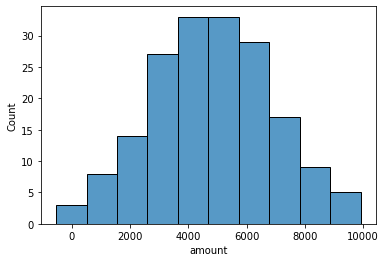

In [31]:
# Histogram of amount with 10 bins
sns.histplot(amir_deals['amount'], bins=10)
plt.show()

Now that we've visualized the data, we know that we can approximate probabilities of different `amounts` using the normal distribution. The `amount` column of `amir_deals` and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, we want to calculate the probability of Amir closing a deal worth various amounts.

In [37]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print("The probability of Amir closing a deal < $7500 worth is {0:.2f}.".format(prob_less_7500))

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print("The probability of Amir closing a deal > $1000 worth is {0:.2f}.".format(prob_over_1000))

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print("The probability of Amir closing a deal between $3000 and $7000 worth is {0:.2f}.".format(prob_3000_to_7000))

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print("The amount that 25% of Amir's deals will be less than is ${0:.2f}.".format(pct_25))

The probability of Amir closing a deal < $7500 worth is 0.89.
The probability of Amir closing a deal > $1000 worth is 0.98.
The probability of Amir closing a deal between $3000 and $7000 worth is 0.68.
The amount that 25% of Amir's deals will be less than is $3651.02.


WE know that we can count on Amir 75% (1-0.25) of the time to make a sale worth at least $3651.02. This information could be useful in making company-wide sales projections.

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 75% and the volatility, or standard deviation, of each sale's worth will increase by 30%. To see what Amir's sales might look like next quarter under these new market conditions, we'll simulate new sales amounts using the normal distribution and store these in the `new_sales` DataFrame.

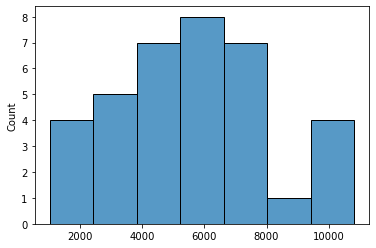

In [40]:
# Calculate new average amount
new_mean = 1.2*5000

# Calculate new standard deviation
new_sd = 1.3*2000

# Simulate 36 new sales
np.random.seed(42)
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
sns.histplot(new_sales)
plt.show()

Although the average sale amount went up, the variation also increased, so it's not straightforward to decide whether these sales are better than his current ones.

#### 3.2 The central limit theorem